# LIST3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio

In [ ]:
def init_pop(N, size=100, ratio=0.5):
    #function to initialize population on a lattice
    pop = np.zeros((size, size))
    agent_pos = np.random.choice(size * size, N, replace=False) # generating random agents positions
    
    blues = int(ratio * N)

    #substituting the positions with values in the flattened array

    pop.flat[agent_pos[:blues]] = 1  # 1 represents blue
    pop.flat[agent_pos[blues:]] = -1  # -1 represents red

    return pop

In [ ]:
def plot_lattice(pop, title):
    #just a plotting function
    plt.imshow(pop, cmap='bwr')
    plt.title(title)
    plt.show()

In [ ]:
def segregation_index(pop, mt):
    bound=int(np.sqrt(mt+1)//2)    
    nbhd_ids=list(range(-bound,bound+1))

    f1=lambda x: x-pop.shape[0] if (x>pop.shape[0]-1) else x #functions to help create the neighborhood
    f2=lambda x: x-pop.shape[1] if (x>pop.shape[1]-1) else x

    seg_ind=[]
    for i in range(pop.shape[0]):
        for j in range(pop.shape[1]):
            state=pop[i, j]
            if pop[i, j] != 0:  
                temp_nbhd = np.array([pop[f1(i+a),f2(j+b)] for a in nbhd_ids for b in nbhd_ids if (a!=0 or b!=0)])
                nbhd = np.delete(temp_nbhd, np.where(temp_nbhd == 0))
                s = np.sum(nbhd[nbhd==state])/mt
                if s<0:
                    s= -s
                seg_ind.append(s)
    return np.mean(seg_ind)
                

In [ ]:
def schelling(N, jt, mt, size=100, ratio=0.5, plots=False):
    pop = init_pop(N,size,ratio)
    pop_start = pop.copy()
    if plots==True or plots=='startstop':
        plot_lattice(pop, "Initial Distribution")

    bound=int(np.sqrt(mt+1)//2)    
    nbhd_ids=list(range(-bound,bound+1))

    f1=lambda x: x-pop.shape[0] if (x>pop.shape[0]-1) else x #function to help create the neighborhood
    f2=lambda x: x-pop.shape[1] if (x>pop.shape[1]-1) else x
    cycles = 0
    while True and cycles<=5000:
        agents_to_move = []

        for i in range(pop.shape[0]):
            for j in range(pop.shape[1]):
                if pop[i, j] == 1:  # Red agent
                    temp_nbhd = np.array([pop[f1(i+a),f2(j+b)] for a in nbhd_ids for b in nbhd_ids if (a!=0 or b!=0)])
                    nbhd = np.delete(temp_nbhd, np.where(temp_nbhd == 0))

                    similar_neighbors = sum(x for x in nbhd if x > 0) 
                    if len(nbhd)!=0:
                        if similar_neighbors/len(nbhd) < jt:
                            agents_to_move.append((i, j, 1))
                    else:
                        agents_to_move.append((i, j, 1))
                elif pop[i, j] == -1:  # blue agent
                    temp_nbhd = np.array([pop[f1(i+a),f2(j+b)] for a in nbhd_ids for b in nbhd_ids if (a!=0 or b!=0)])
                    nbhd = np.delete(temp_nbhd, np.where(temp_nbhd == 0))

                    similar_neighbors = sum(x for x in nbhd if x < 0)  
                    if len(nbhd)!=0:
                        if -similar_neighbors/len(nbhd) < jt:
                            agents_to_move.append((i, j, -1))
                    else:
                        agents_to_move.append((i, j, -1))

        if not agents_to_move:
            break
        if plots==True:
            if cycles % 10 == 0:
                plot_lattice(pop, "Final Distribution")
        for agent in agents_to_move:
            empty_spots = np.argwhere(pop == 0)
            new_spot = empty_spots[np.random.choice(len(empty_spots))]
            pop[agent[0], agent[1]] = 0
            pop[new_spot[0], new_spot[1]] = agent[2]

        cycles += 1
    if plots==True or plots=='startstop':
        plot_lattice(pop, "Final Distribution")

    segregation = segregation_index(pop, mt)

    return cycles, segregation , pop , pop_start

## Tasks 1 and 2

Below there are several plots, that show the stability of the simulations.

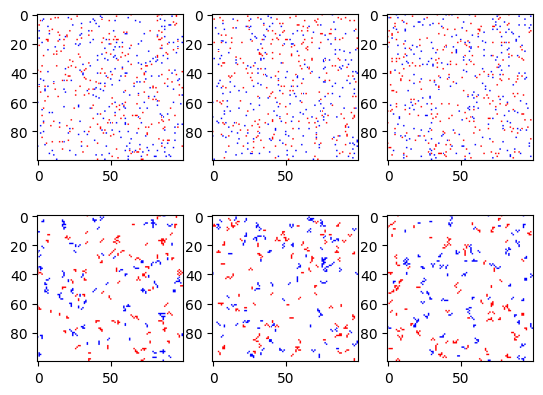

In [ ]:
c,s,p1,ps1=schelling(500, 0.5, 8)
c,s,p2,ps2=schelling(500, 0.5, 8)
c,s,p3,ps3=schelling(500, 0.5, 8)
c,s,p4,ps4=schelling(500, 0.5, 8)
fig, axs = plt.subplots(2, 3)

axs[1,0].imshow(p1, cmap='bwr')
axs[1,1].imshow(p2, cmap='bwr')
axs[1,2].imshow(p3, cmap='bwr')
axs[0,0].imshow(ps1, cmap='bwr')
axs[0,1].imshow(ps2, cmap='bwr')
axs[0,2].imshow(ps3, cmap='bwr')

## Task 3

In [ ]:
populations = [500, 1000, 2000, 4000, 6000, 8000]
vals=[]
for p in populations:
    v=0
    for i in range(50):
        c,s,p1,ps1=schelling(p, 0.5, 8)
        v+=c/50
    vals.append(v)

Text(0, 0.5, 'Average iterations')

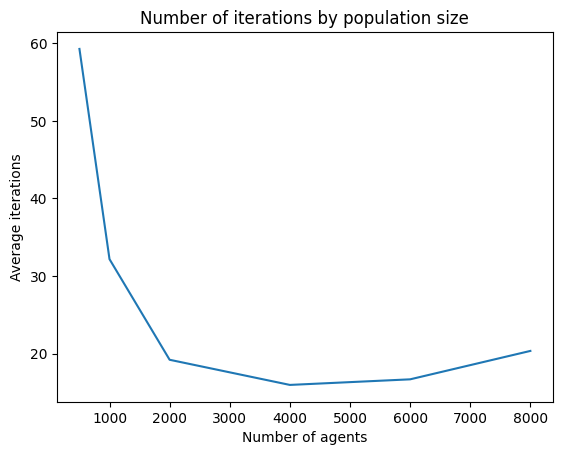

In [ ]:
plt.plot(populations,vals)
plt.title('Number of iterations by population size')
plt.xlabel('Number of agents')
plt.ylabel('Average iterations')

We can see that the number of iterations gets lower as the number of agents approaches 4000 and then starts slowly growing. In lower populations it is harder to find neighbours.

## Task4

Below is the solution to the task 4.

In [ ]:
jts = np.arange(0.1,0.9,0.1)
vals=[]
for j in jts:
    c,s,p1,ps1=schelling(250, j, 8)    
    vals.append(s)

Text(0, 0.5, 'Segregation index')

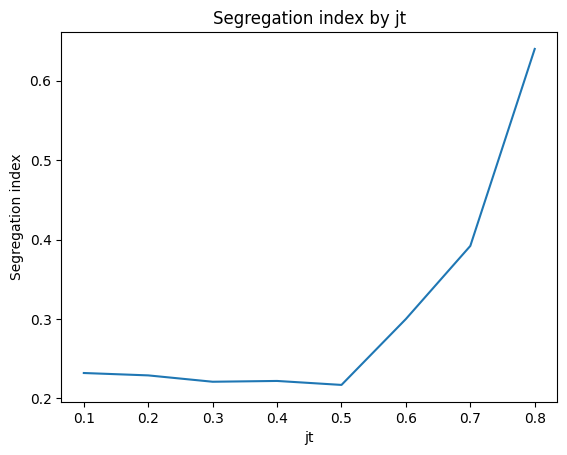

In [ ]:
plt.plot(jts,vals)
plt.title('Segregation index by jt')
plt.xlabel('jt')
plt.ylabel('Segregation index')

With the increase of jt parameter, the segregation index gets bigger. For values below 0.5 the values of segregation index oscilate around 0.2.

## Task5

Below is the solution to the task 5.

In [ ]:
mts = [8, 24, 48, 80, 120]
vals=[]
for m in mts:
    c,s,p1,ps1=schelling(250, 0.5, m)    
    vals.append(s)

Text(0, 0.5, 'Segregation index')

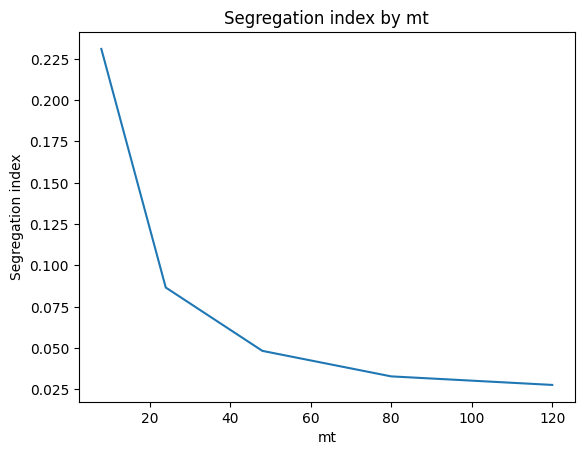

In [ ]:
plt.plot(mts,vals)
plt.title('Segregation index by mt')
plt.xlabel('mt')
plt.ylabel('Segregation index')

We can see, that as the number of neighbours taken into account increases, the segregation index gets lower. 

## Task 6

Below is modified original function, but instead of taking jt as a parameter, it is hard coded to parameters in task 6.

In [ ]:
def schelling1(N, mt, size=100, ratio=0.5, plots=False):
    pop = init_pop(N,size,ratio)
    pop_start = pop.copy()
    if plots==True or plots=='startstop':
        plot_lattice(pop, "Initial Distribution")

    bound=int(np.sqrt(mt+1)//2)    
    nbhd_ids=list(range(-bound,bound+1))

    f1=lambda x: x-pop.shape[0] if (x>pop.shape[0]-1) else x #function to help create the neighborhood
    f2=lambda x: x-pop.shape[1] if (x>pop.shape[1]-1) else x
    cycles = 0
    while True and cycles<=5000:
        agents_to_move = []

        for i in range(pop.shape[0]):
            for j in range(pop.shape[1]):
                if pop[i, j] == 1:  # Blue agent
                    temp_nbhd = np.array([pop[f1(i+a),f2(j+b)] for a in nbhd_ids for b in nbhd_ids if (a!=0 or b!=0)])
                    nbhd = np.delete(temp_nbhd, np.where(temp_nbhd == 0))

                    similar_neighbors = sum(x for x in nbhd if x > 0) 
                    if len(nbhd)!=0:
                        if similar_neighbors/len(nbhd) < 6/8:
                            agents_to_move.append((i, j, 1))
                    else:
                        agents_to_move.append((i, j, 1))
                elif pop[i, j] == -1:  # red agent
                    temp_nbhd = np.array([pop[f1(i+a),f2(j+b)] for a in nbhd_ids for b in nbhd_ids if (a!=0 or b!=0)])
                    nbhd = np.delete(temp_nbhd, np.where(temp_nbhd == 0))

                    similar_neighbors = sum(x for x in nbhd if x < 0)  
                    if len(nbhd)!=0:
                        if -similar_neighbors/len(nbhd) < 3/8:
                            agents_to_move.append((i, j, -1))
                    else:
                        agents_to_move.append((i, j, -1))

        if not agents_to_move:
            break
        if plots==True:
            if cycles % 10 == 0:
                plot_lattice(pop, "Final Distribution")
        for agent in agents_to_move:
            empty_spots = np.argwhere(pop == 0)
            new_spot = empty_spots[np.random.choice(len(empty_spots))]
            pop[agent[0], agent[1]] = 0
            pop[new_spot[0], new_spot[1]] = agent[2]

        cycles += 1
    if plots==True or plots=='startstop':
        plot_lattice(pop, "Final Distribution")

    segregation = segregation_index(pop, mt)

    return cycles, segregation , pop , pop_start

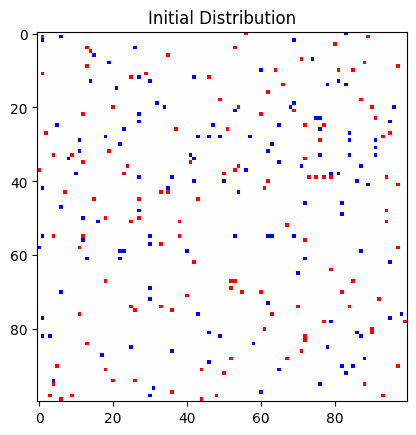

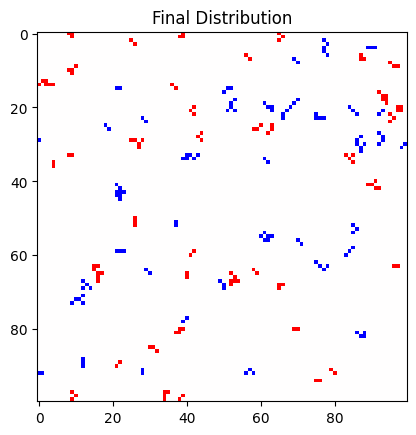

In [ ]:
c,s,p1,ps1=schelling1(250, 8,plots='startstop')

At the first glance its hard to tell what the change in the parameters did, so we will look at a larger population.

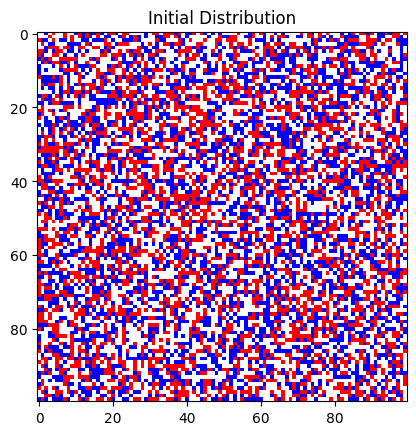

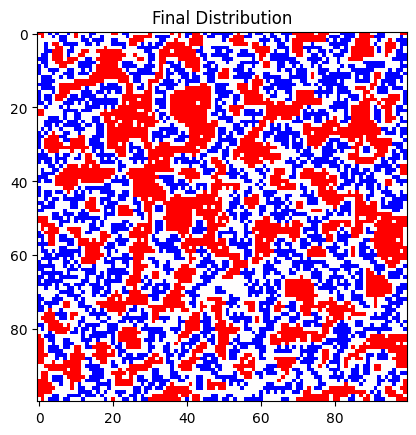

In [ ]:
c,s,p1,ps1=schelling1(6000, 8,plots='startstop')

Now we can clearly see, that because of the change in parameters, the red agents create more tightly packed clusters than blue ones.

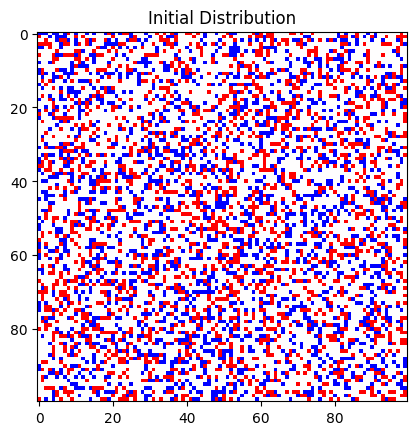

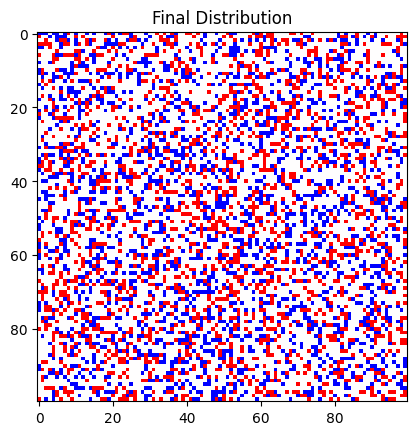

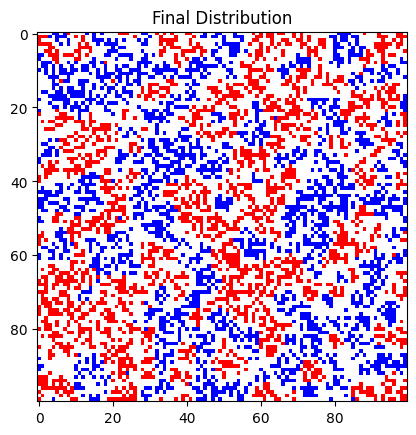

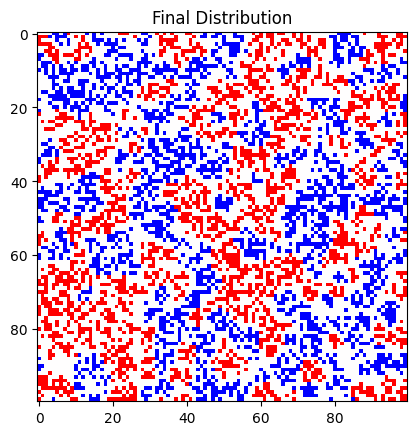

In [ ]:
c,s,p,ps=schelling(4000,0.5, 24,plots=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3ec5c87c-f518-4cc9-8f2b-953db59a48eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>